**Seaborn is a data visualization library in Python based on matplotlib**

***By using the seaborn library we can easily represent our data on plot.***

# Types of seaborn plot

## 1-Distribution Plots

***These plots are:***

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot


**Imports**

In [2]:
import seaborn as sns
%matplotlib inline      
import pandas as pd
import numpy as np

**Data**

Seaborn comes with built-in data sets!

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### distplot

The distplot shows the distribution of a univariate set of observations.

In [8]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

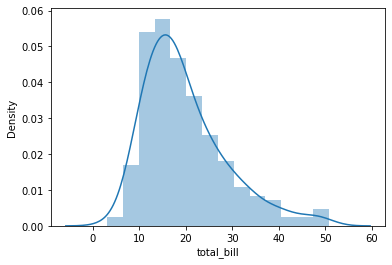

In [9]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

<AxesSubplot:xlabel='total_bill'>

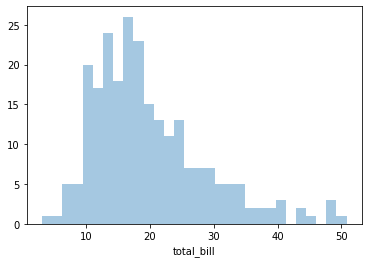

In [10]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

### jointplot

jointplot() allows us to basically match up two distplots for bivariate data. With our choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

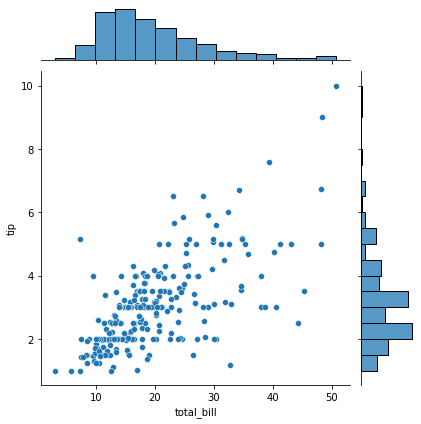

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

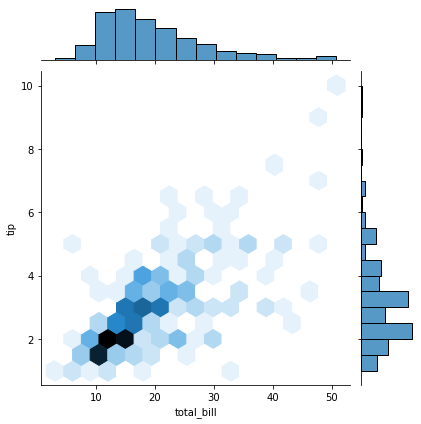

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

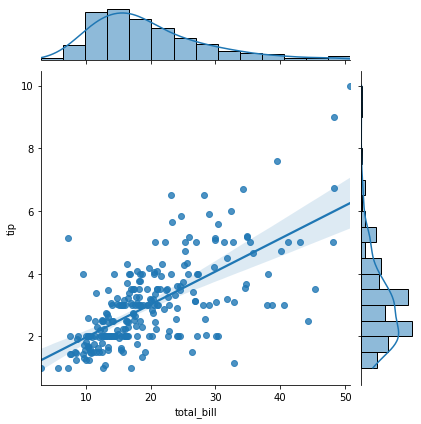

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

### pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

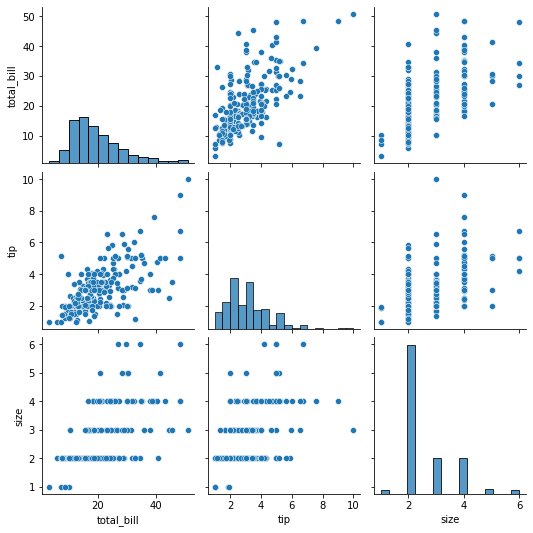

In [14]:
sns.pairplot(tips)

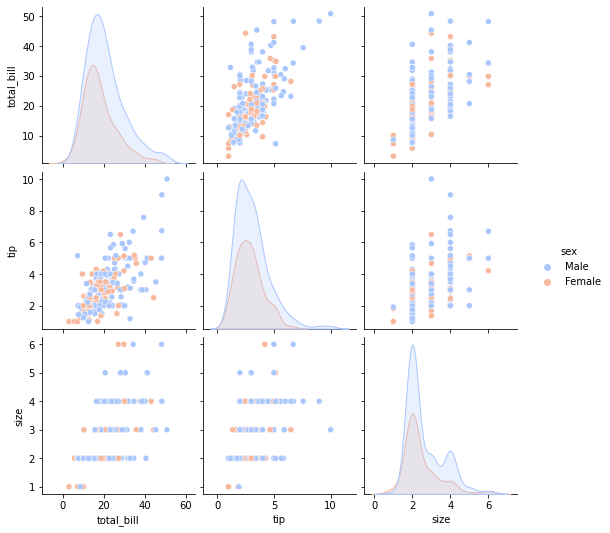

In [15]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

### rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot:xlabel='total_bill'>

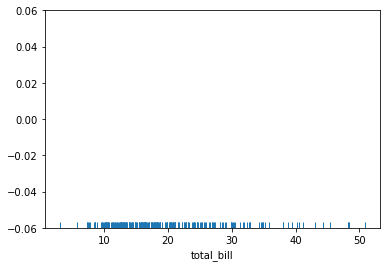

In [16]:
sns.rugplot(tips['total_bill'])

### kde plot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

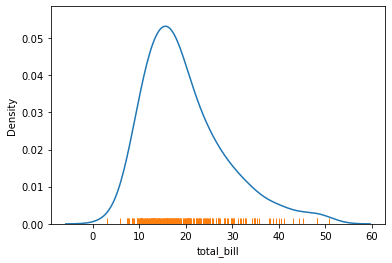

In [18]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

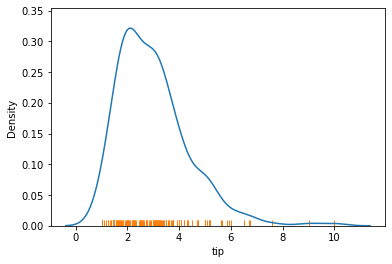

In [19]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# 2-Categorical plots

***There are a few main plot types for this:***

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

### barplot

These very similar plots allow us to get aggregate data off a categorical feature in your data. 

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

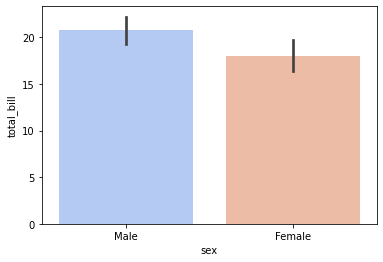

In [20]:
sns.barplot(x='sex',y='total_bill',data=tips, palette = 'coolwarm')

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='sex', ylabel='count'>

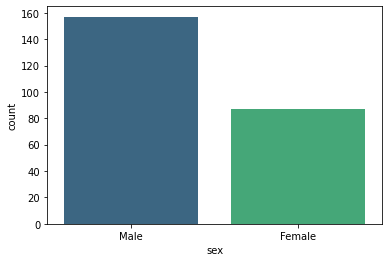

In [21]:
sns.countplot(x='sex',data=tips, palette = 'viridis')

### boxplot

boxplots are used to shown the distribution of categorical data. A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

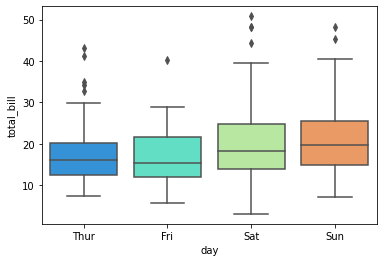

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:>

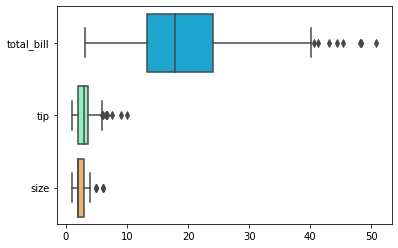

In [23]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

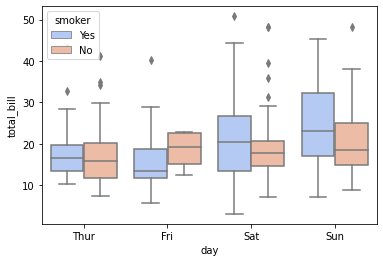

In [24]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

### violinplot
A violin plot plays a similar role as a box. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

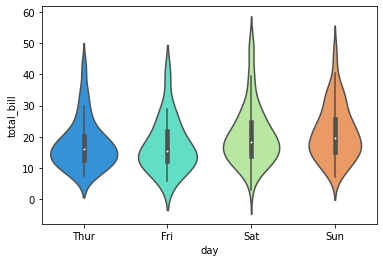

In [25]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

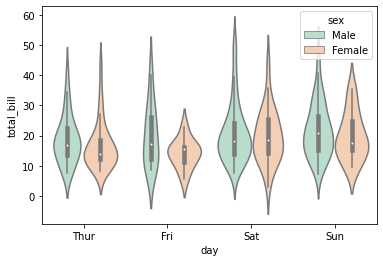

In [31]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Pastel2')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

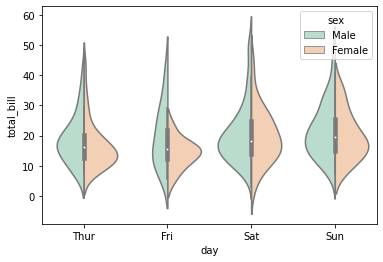

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Pastel2')

### stripplot 
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

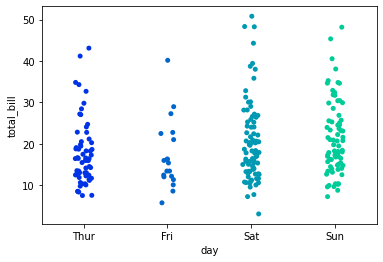

In [34]:
sns.stripplot(x="day", y="total_bill", data=tips, palette = 'winter')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

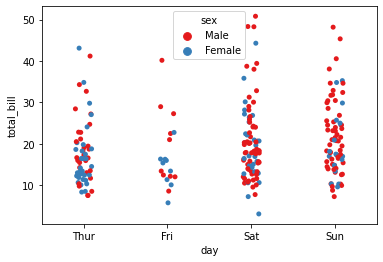

In [35]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

### swarmplot

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

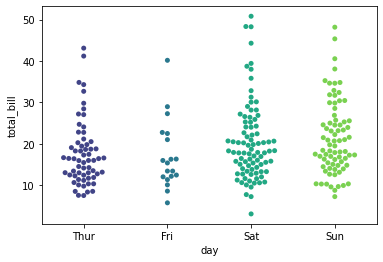

In [39]:
sns.swarmplot(x="day", y="total_bill", data=tips, palette = 'viridis')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

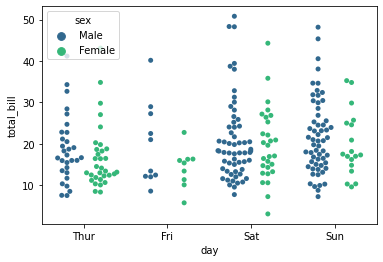

In [41]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="viridis", split=True)

***Combining Categorical Plots***

<AxesSubplot:xlabel='tip', ylabel='day'>

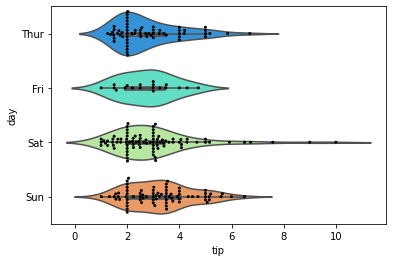

In [42]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## 3-Matrix plot

Matrix plots allows us to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

In [43]:
flights = sns.load_dataset('flights')

In [44]:
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [45]:
tips = sns.load_dataset('tips')

In [46]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Heatmap

In order for a heatmap to work properly, our data should already be in a matrix form, the sns.heatmap function basically just colors it in for us. 

In [47]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

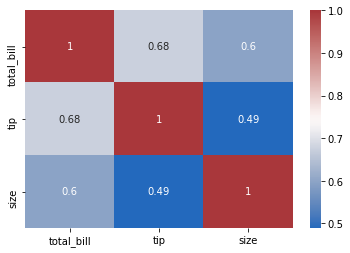

In [54]:
sns.heatmap(tips.corr(), cmap = 'vlag', annot = True)

In [55]:
#for fligh data

flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

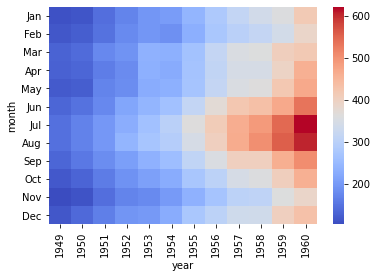

In [58]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights,cmap = 'coolwarm')

<AxesSubplot:xlabel='year', ylabel='month'>

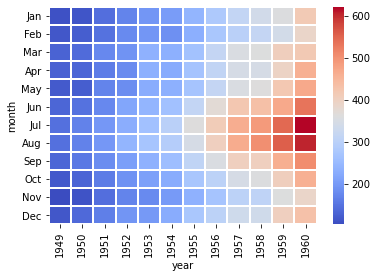

In [59]:
sns.heatmap(pvflights,cmap='coolwarm',linecolor='white',linewidths=1)

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

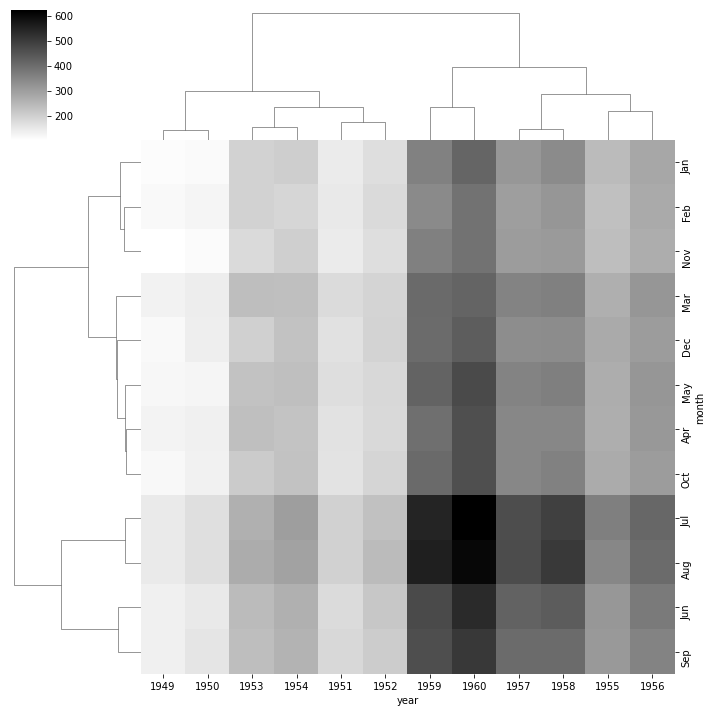

In [69]:
sns.clustermap(pvflights, cmap = 'binary')

## 4-Regression plot

**lmplot()**

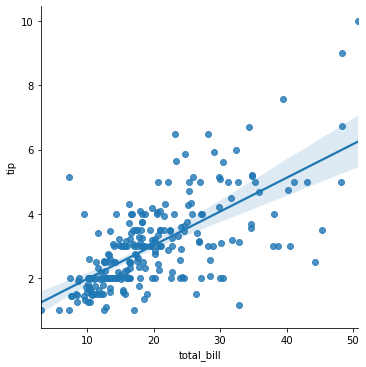

In [71]:
sns.lmplot(x='total_bill',y='tip',data=tips)

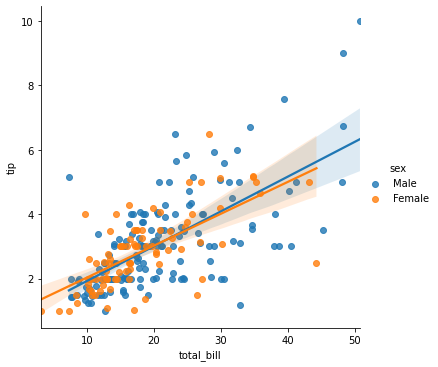

In [72]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

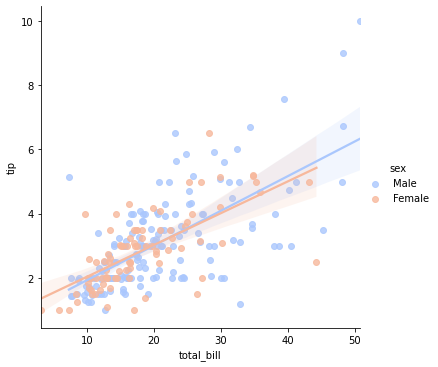

In [73]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

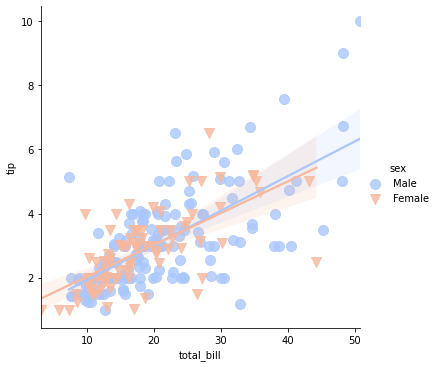

In [74]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

**Using a Grid**

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

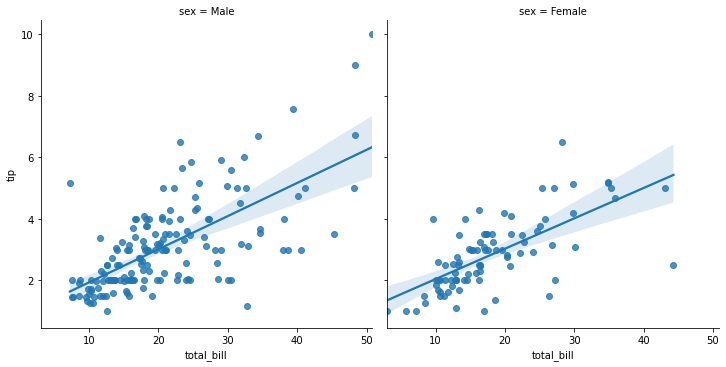

In [75]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

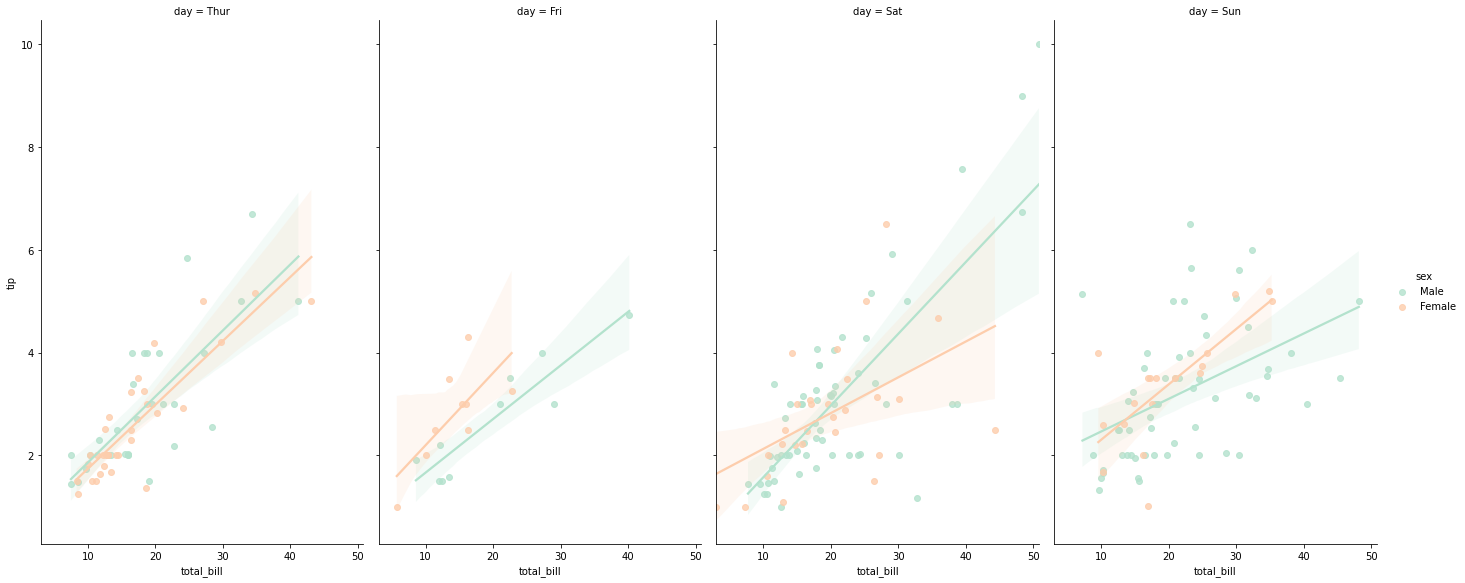

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='Pastel2',
          aspect=0.6,size=8)

## 5-Grids

**pair grid**

Tis is a subplot grid for plotting pairwise relationship in dataset

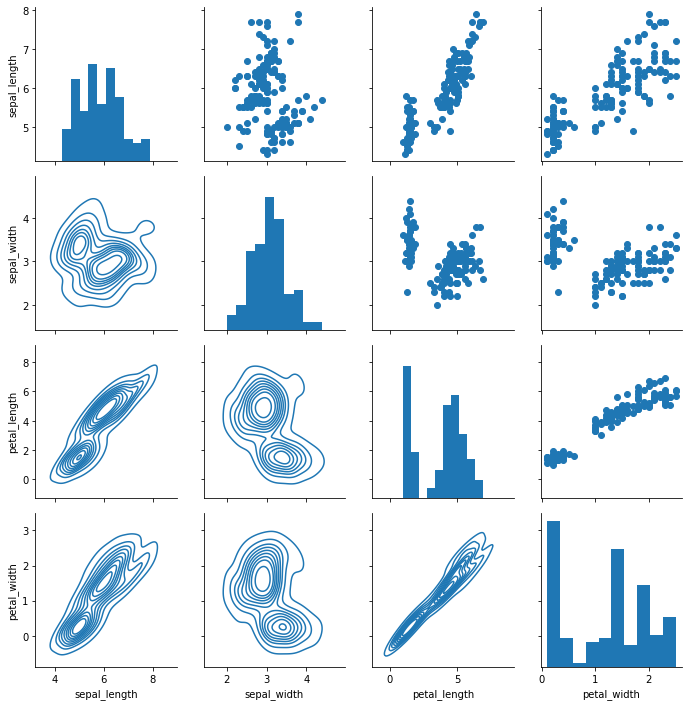

In [86]:
iris = sns.load_dataset('iris')
import matplotlib.pyplot as plt

# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

**pair plot**

It is a simpler version of pairgrid

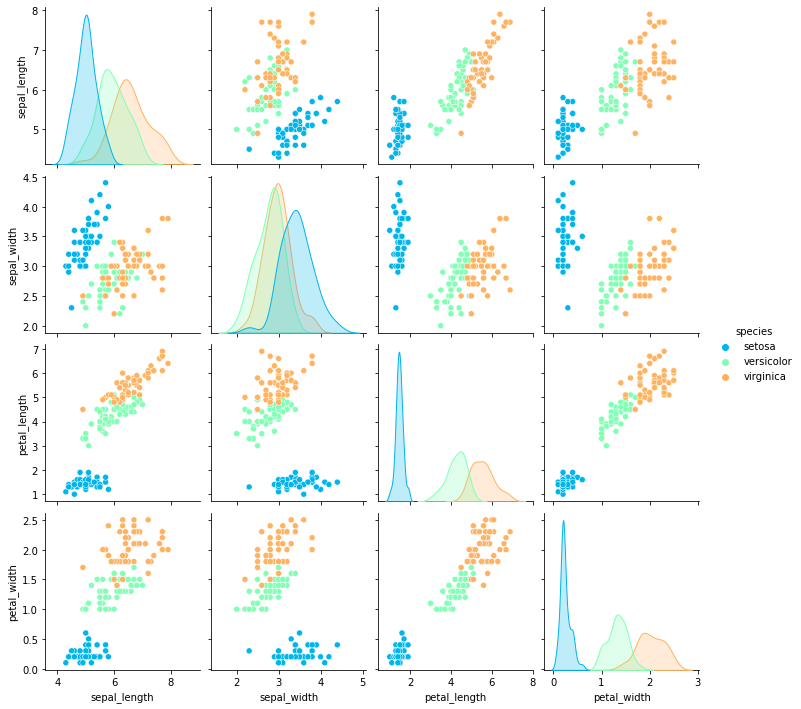

In [87]:
sns.pairplot(iris,hue='species',palette='rainbow')

**facet grid**

general way to create grids of plots based on feature

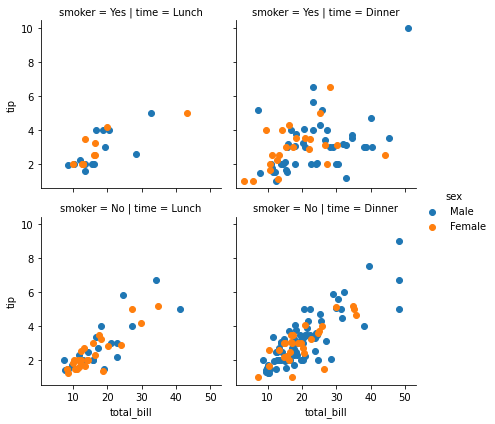

In [88]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

**joint grid**

Its a genreal version of jointplot

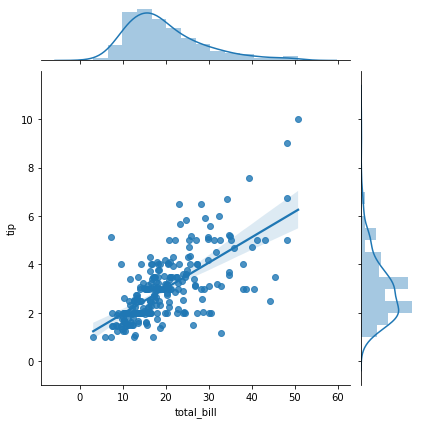

In [89]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

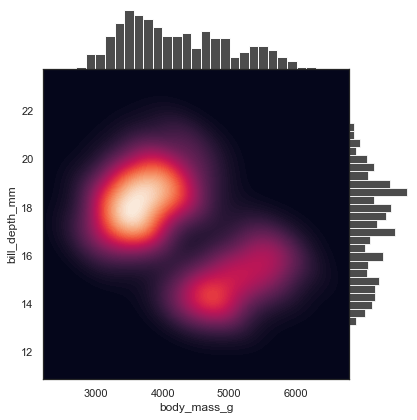

In [98]:
import seaborn as sns
sns.set_theme(style="white")

df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="black", alpha=.7, bins=25)